In [40]:
from mpl_toolkits import mplot3d
import functions as fn
%matplotlib notebook
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import levene

In [41]:
filename = '../data/uf20-91/uf20-01.cnf'
infinite=2**31
num_vars, clauses = fn.read_problem(filename)
set_vars = [infinite]*num_vars
pop_size = 100

In [42]:
population = fn.random_population(num_vars, set_vars, pop_size)
pop_fitness, max_fitness, max_fit_indiv = fn.evaluate_population(population, clauses, fn.maxsat_fitness)
rand_fitness_array = [x[1] for x in pop_fitness]

<IPython.core.display.Javascript object>


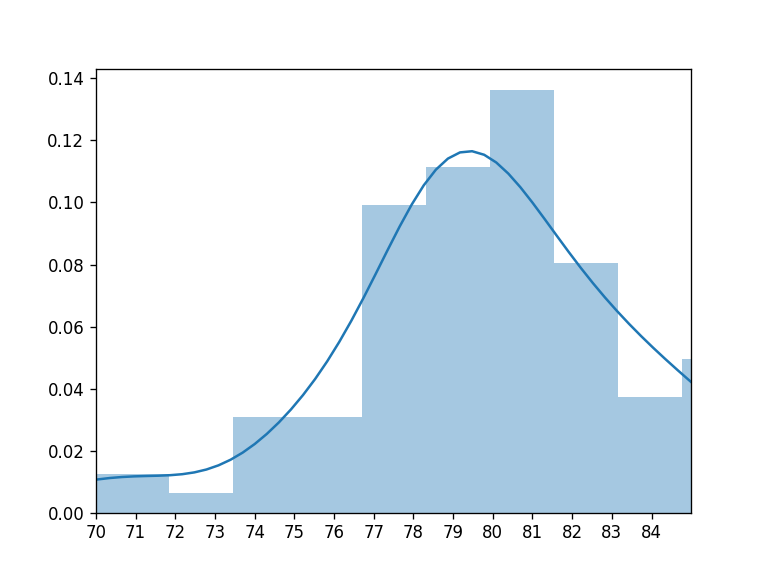

In [43]:
fig, ax = plt.subplots()
sns.distplot(rand_fitness_array, ax=ax)
ax.set_xlim(70,85)
ax.set_xticks(range(70,85))
plt.show()

In [44]:
population = fn.binary_range_population(num_vars, set_vars, pop_size)
pop_fitness, max_fitness, max_fit_indiv = fn.evaluate_population(population, clauses, fn.maxsat_fitness)
bin_fitness_array = [x[1] for x in pop_fitness]

<IPython.core.display.Javascript object>


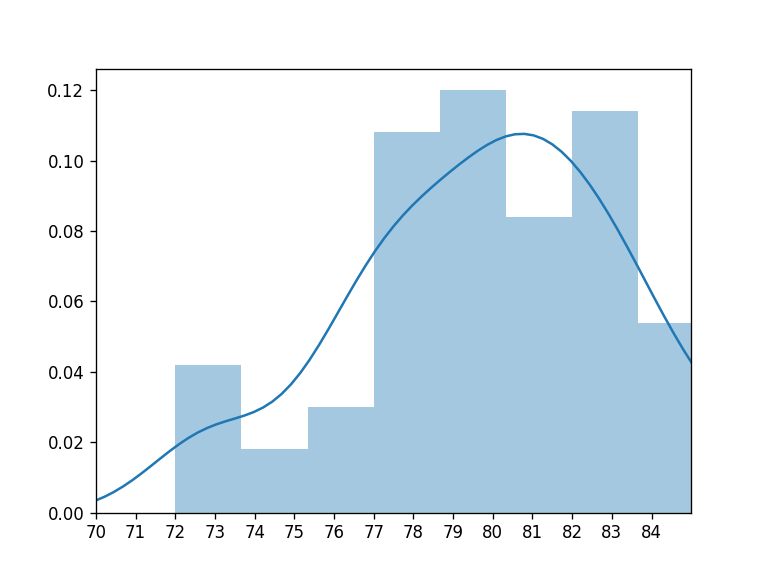

In [45]:
fig, ax = plt.subplots()
sns.distplot(bin_fitness_array, ax=ax)
ax.set_xlim(70,85)
ax.set_xticks(range(70,85))
plt.show()

In [49]:
population = fn.satisfy_clauses_population(num_vars, set_vars, pop_size, clauses)
pop_fitness, max_fitness, max_fit_indiv = fn.evaluate_population(population, clauses, fn.maxsat_fitness)
sc_fitness_array = []
max_f, min_f = 0, infinite
for x in pop_fitness:
    sc_fitness_array += [x[1]]
    if x[1]<min_f: min_f = x[1]
    if x[1]>max_f: max_f = x[1]

<IPython.core.display.Javascript object>


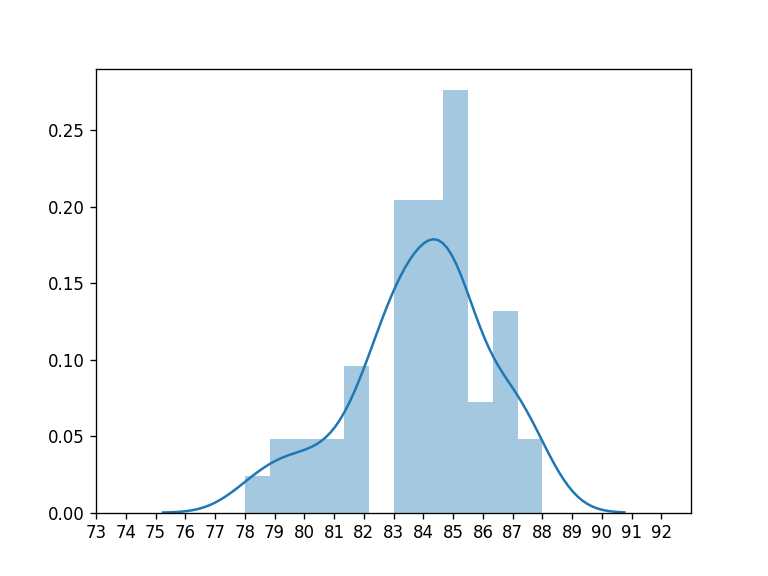

In [50]:
fig, ax = plt.subplots()
sns.distplot(sc_fitness_array, ax=ax)
ax.set_xlim(min_f-5,max_f+5)
ax.set_xticks(range(min_f-5,max_f+5))
plt.show()

In [55]:
statistic, result = levene(rand_fitness_array,bin_fitness_array)

print(statistic, result)

0.05853334072390675 0.8090796472752364
